<a href="https://colab.research.google.com/github/gagan3754/-OLA---Ensemble-Learning/blob/main/OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/ola_driver_scaler.csv")

In [3]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


Definition of problem (as per given problem statement with additional views)

Ola, a major ride-hailing platform, is facing a high rate of driver attrition. Drivers frequently leave the platform or switch to competitors like Uber, primarily influenced by pay rates, job flexibility, and incentive structures. This churn not only impacts the continuity of operations and customer satisfaction but also increases recruitment and training costs, directly affecting the bottom line.

As Ola scales, sustaining a reliable and loyal driver base becomes increasingly crucial. Understanding the patterns and key drivers behind attrition is necessary to formulate effective retention strategies.
The goal is to develop a predictive model that can accurately identify drivers who are likely to leave the company in the near future. This model will be used by the driver engagement and HR teams to:

Implement targeted retention campaigns.

Optimize driver incentive structures.

Improve forecasting and planning for recruitment

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


1. Define Problem Statement and perform Exploratory Data Analysis

Definition of problem (as per given problem statement with additional views)




Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.


In [6]:
df.shape

(19104, 13)

In [7]:
df.dtypes

,0
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object
Joining Designation,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [9]:
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [10]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


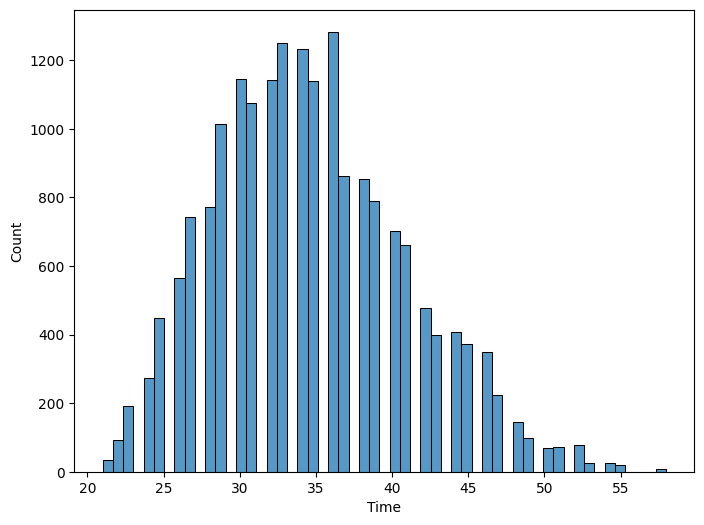

In [12]:
#Histplot for Time

plt.figure(figsize=(8,6))
sns.histplot(df['Age'])
plt.xlabel('Time')
plt.show()

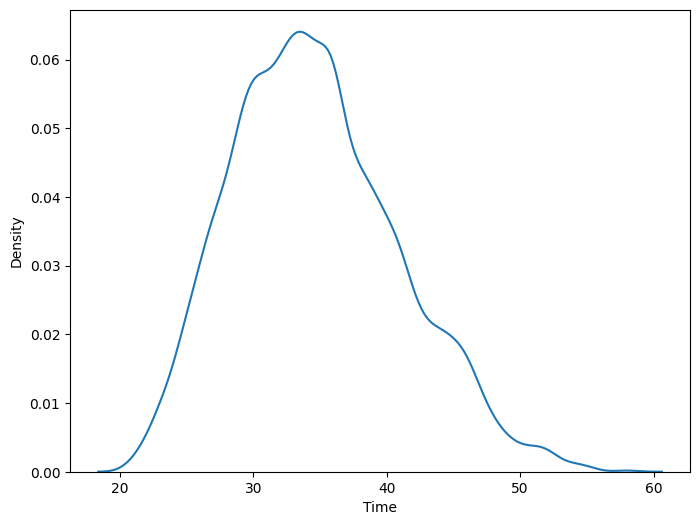

In [13]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Age'])
plt.xlabel('Time')
plt.show()

#Countplot

In [14]:
cols=['Education_Level','Gender','City','Grade','Quarterly Rating']

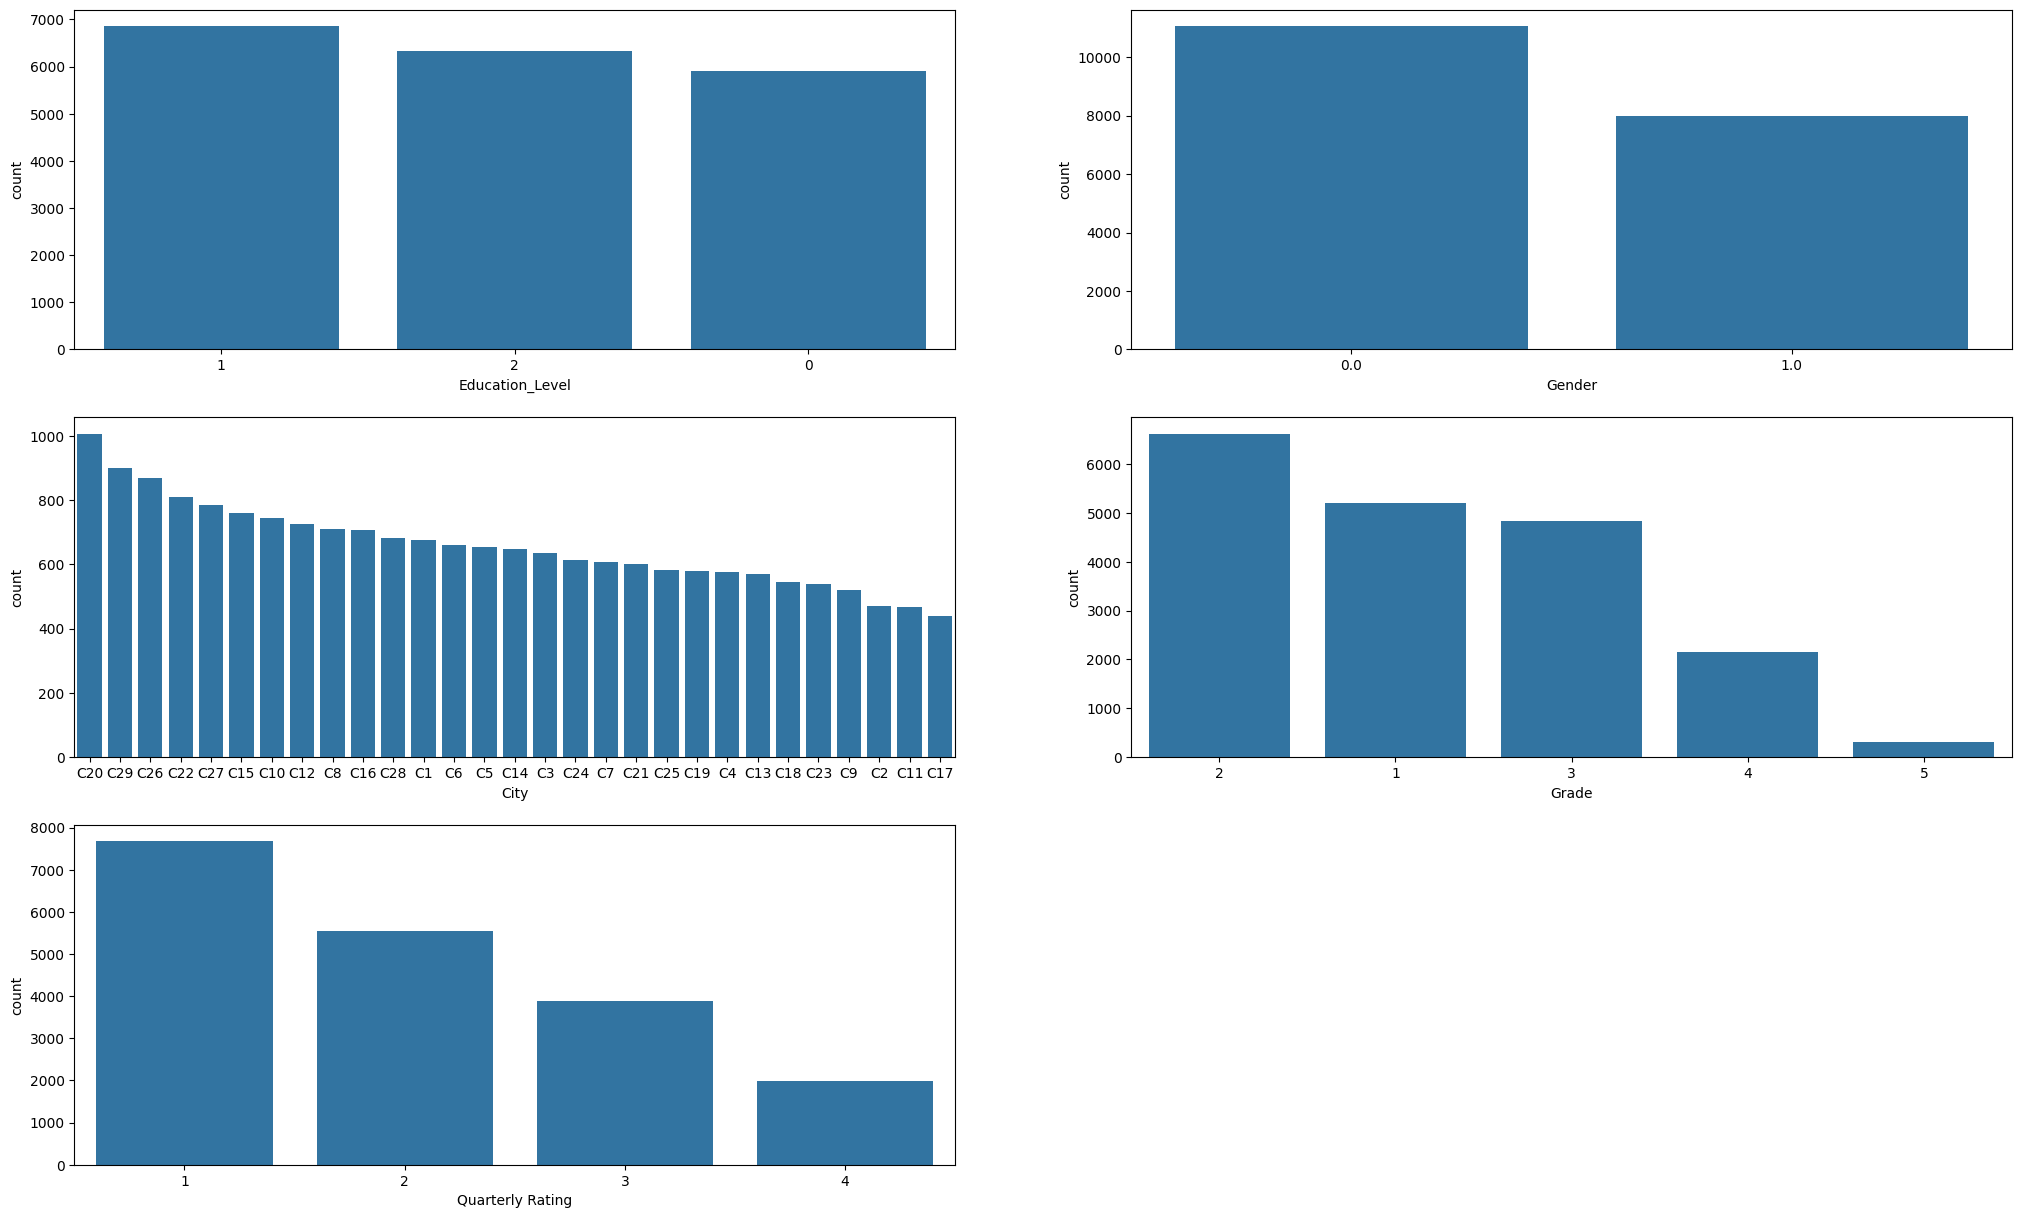

In [15]:
plt.figure(figsize=(25, 15))
j=1
for i in cols:
  plt.subplot(3,2,j)
  sns.countplot(x=df[i],order=df[i].value_counts().index)
  plt.xlabel(i)
  j+=1

In [16]:
#Boxplot

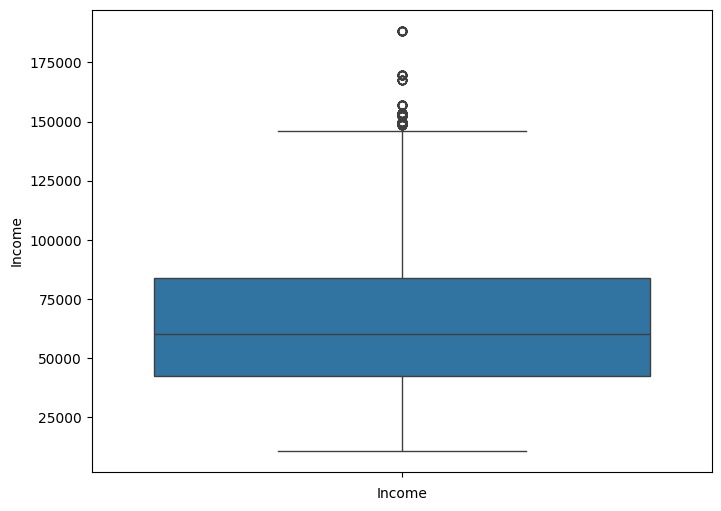

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Income'])
plt.xlabel('Income')
plt.show()

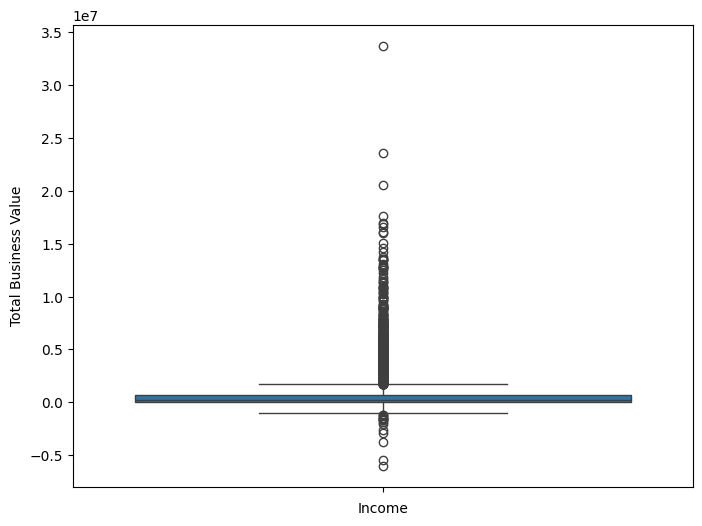

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Total Business Value'])
plt.xlabel('Income')
plt.show()

Bivariate Analysis (Relationships between important variables)

In [19]:
#countplot

In [20]:
cols=['Education_Level', 'City', 'Grade', 'Quarterly Rating']

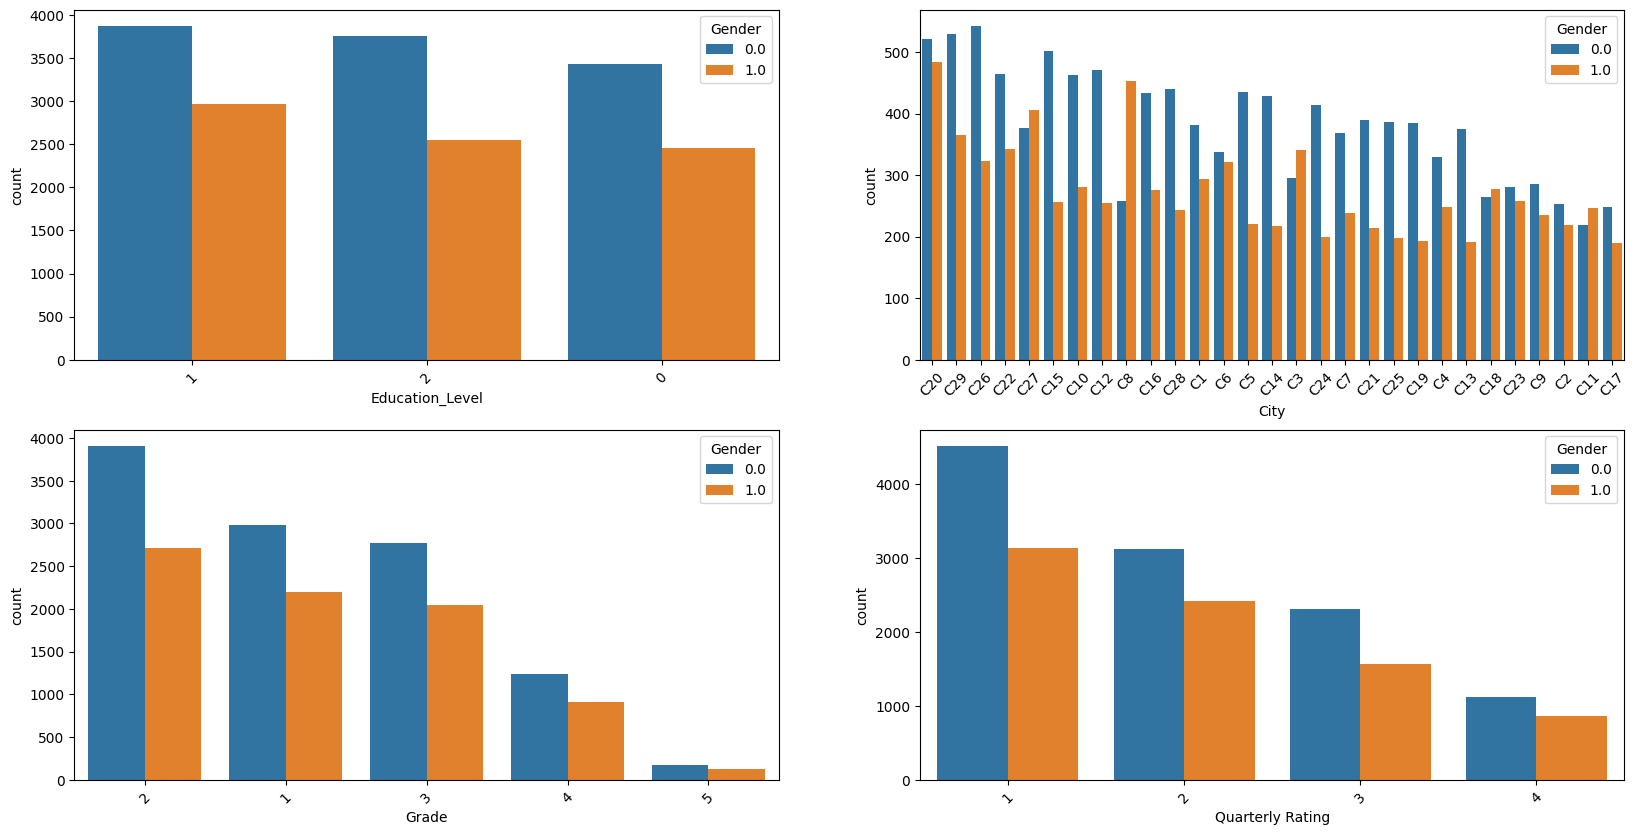

In [21]:
plt.figure(figsize=(20,10))
j=1
for i in cols:
  plt.subplot(2,2,j)
  sns.countplot(x=df[i],hue=df['Gender'],order=df[i].value_counts().index)
  plt.xlabel(i)
  plt.xticks(rotation=45)
  j+=1

In [22]:
#Boxplot

In [23]:
cols=['Education_Level', 'Grade', 'Quarterly Rating','Gender']

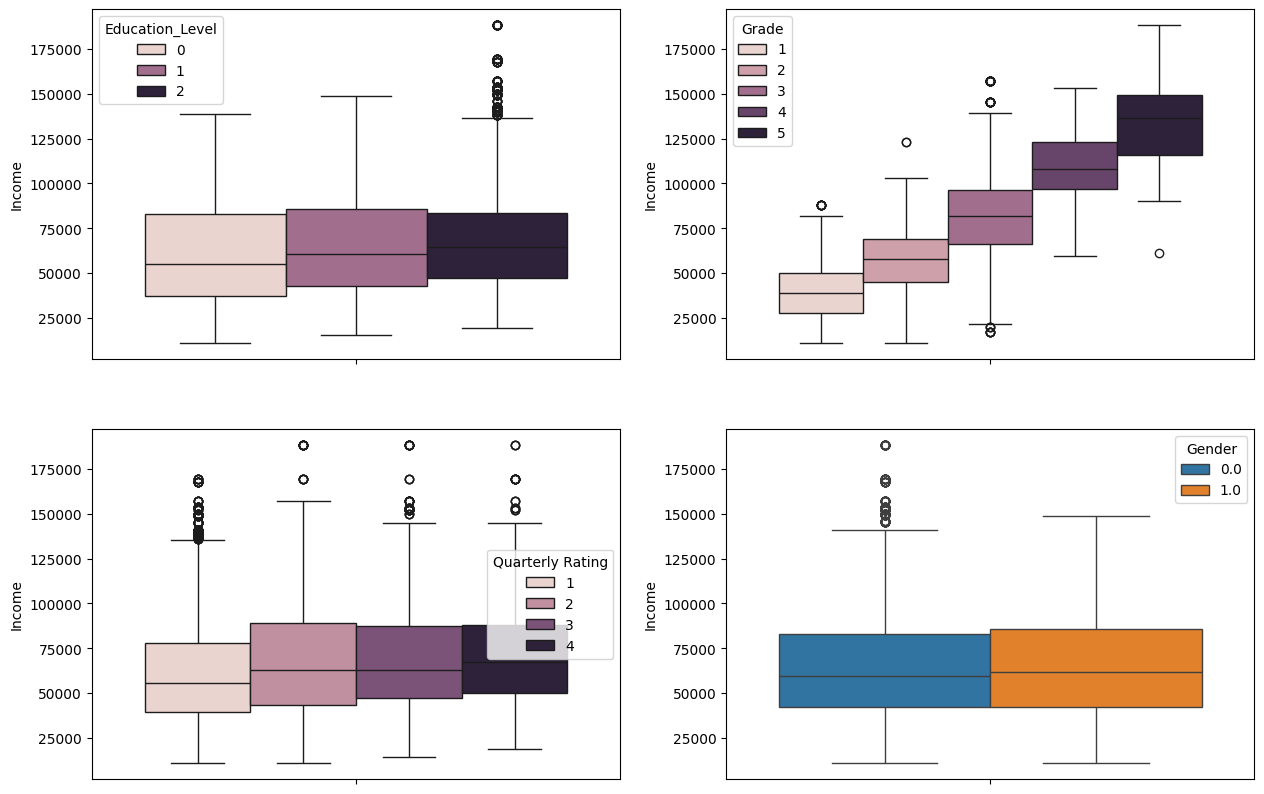

In [24]:
plt.figure(figsize=(15,10))
j=1
for i in cols:
  plt.subplot(2,2,j)
  sns.boxplot(y=df['Income'],hue=df[i])
  j+=1

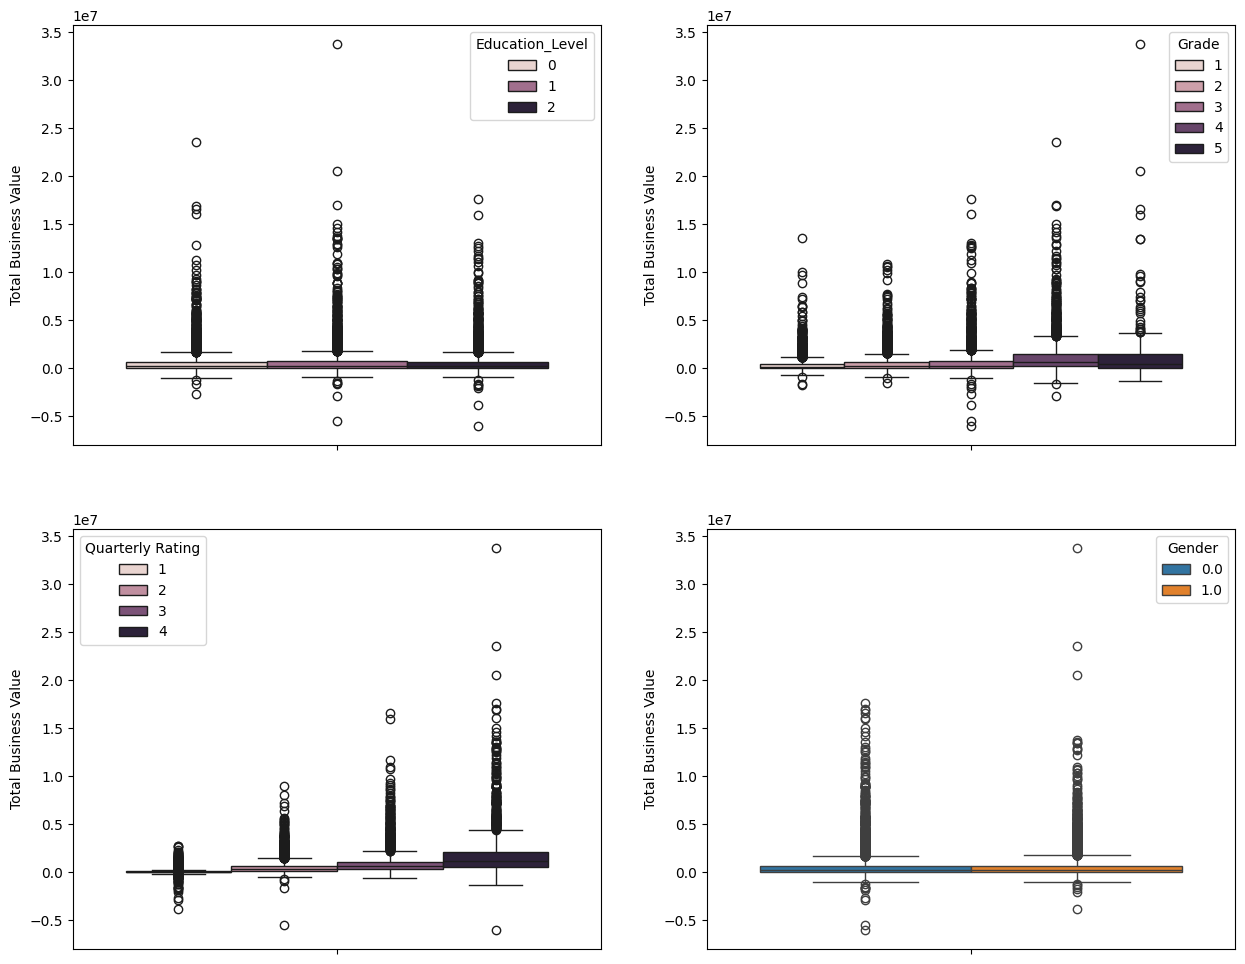

In [25]:
plt.figure(figsize=(15,12))
j=1
for i in cols:
  plt.subplot(2,2,j)
  sns.boxplot(y=df['Total Business Value'],hue=df[i])
  j+=1

In [26]:
#barplot

In [27]:
cols

['Education_Level', 'Grade', 'Quarterly Rating', 'Gender']

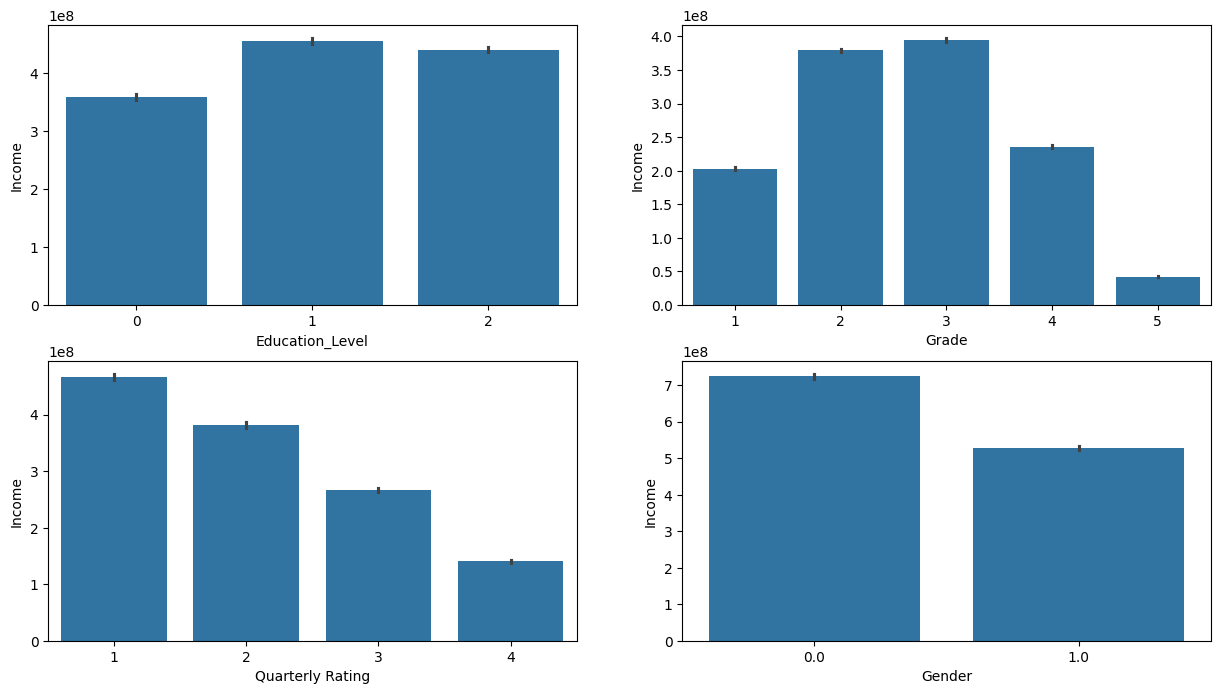

In [28]:
j=1
plt.figure(figsize=(15,8))
for i in cols:
  plt.subplot(2,2,j)
  sns.barplot(x=df[i],y=df['Income'],estimator='sum')
  j+=1

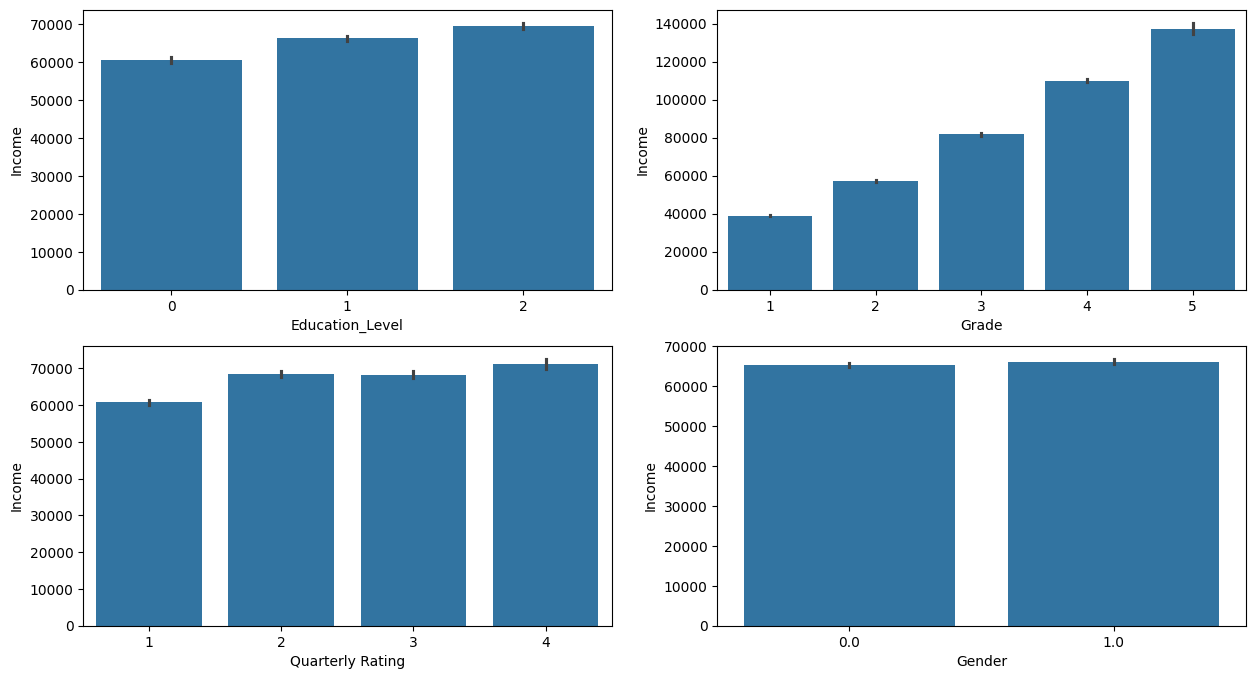

In [29]:
j=1
plt.figure(figsize=(15,8))
for i in cols:
  plt.subplot(2,2,j)
  sns.barplot(x=df[i],y=df['Income'],estimator='mean')
  j+=1

In [30]:
# Barplot for total buisness

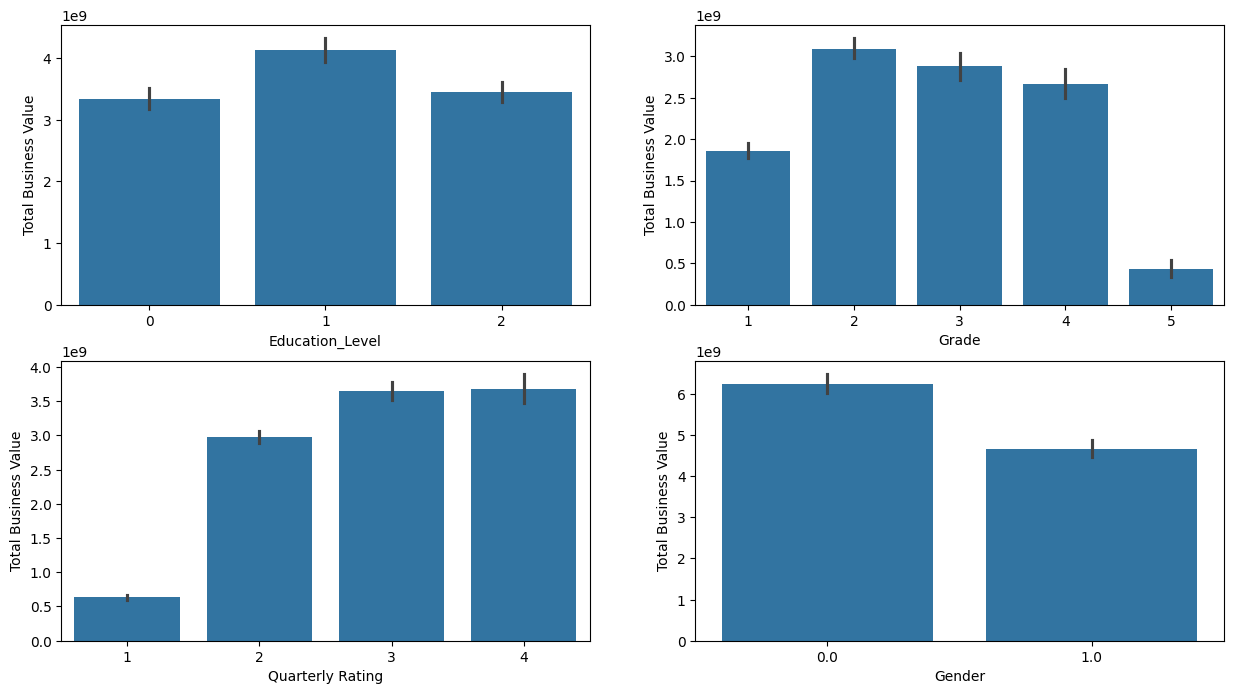

In [31]:
j=1
plt.figure(figsize=(15,8))
for i in cols:
  plt.subplot(2,2,j)
  sns.barplot(x=df[i],y=df['Total Business Value'],estimator='sum')
  j+=1

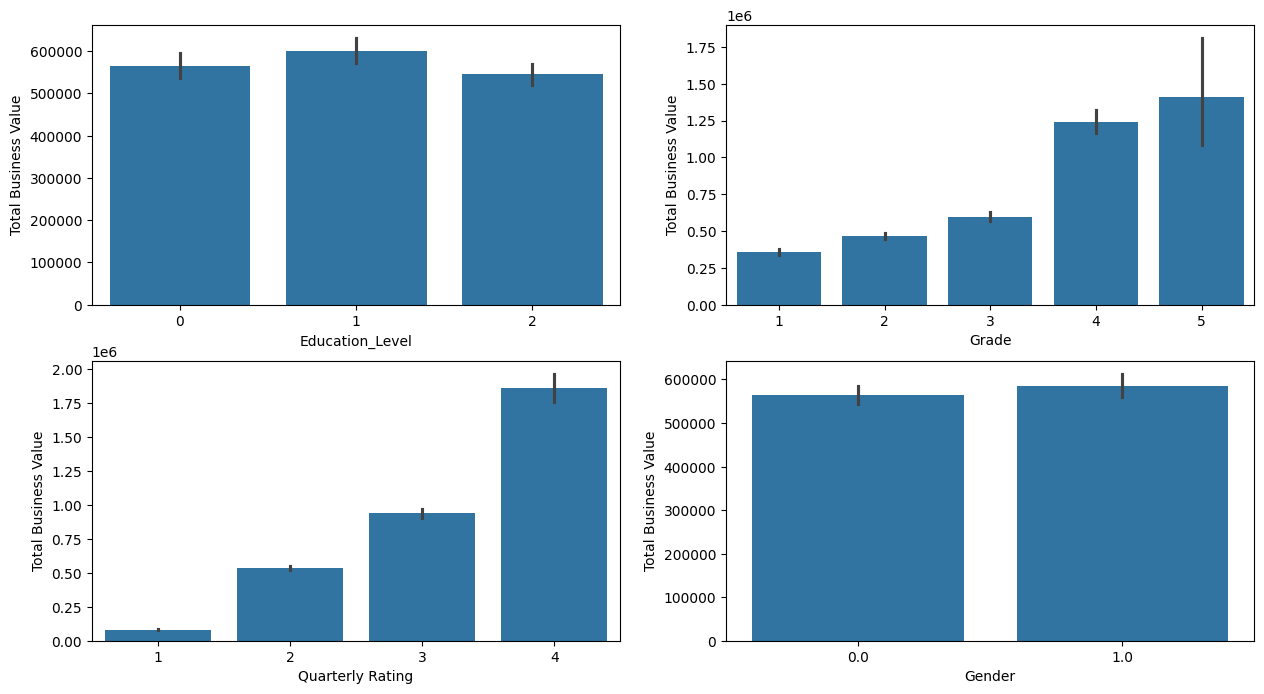

In [32]:
j=1
plt.figure(figsize=(15,8))
for i in cols:
  plt.subplot(2,2,j)
  sns.barplot(x=df[i],y=df['Total Business Value'],estimator='mean')
  j+=1

Scatter plot for Driver Id and Income Value

<Axes: xlabel='Driver_ID', ylabel='Income'>

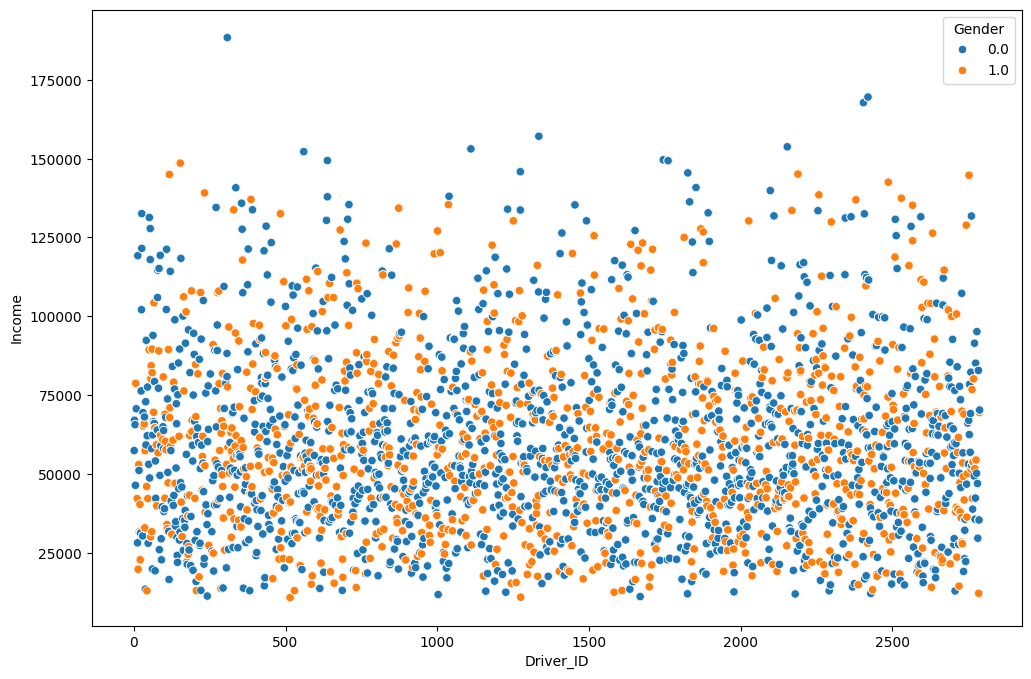

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Driver_ID'],y=df['Income'],hue=df['Gender'])

<Axes: xlabel='Income', ylabel='Age'>

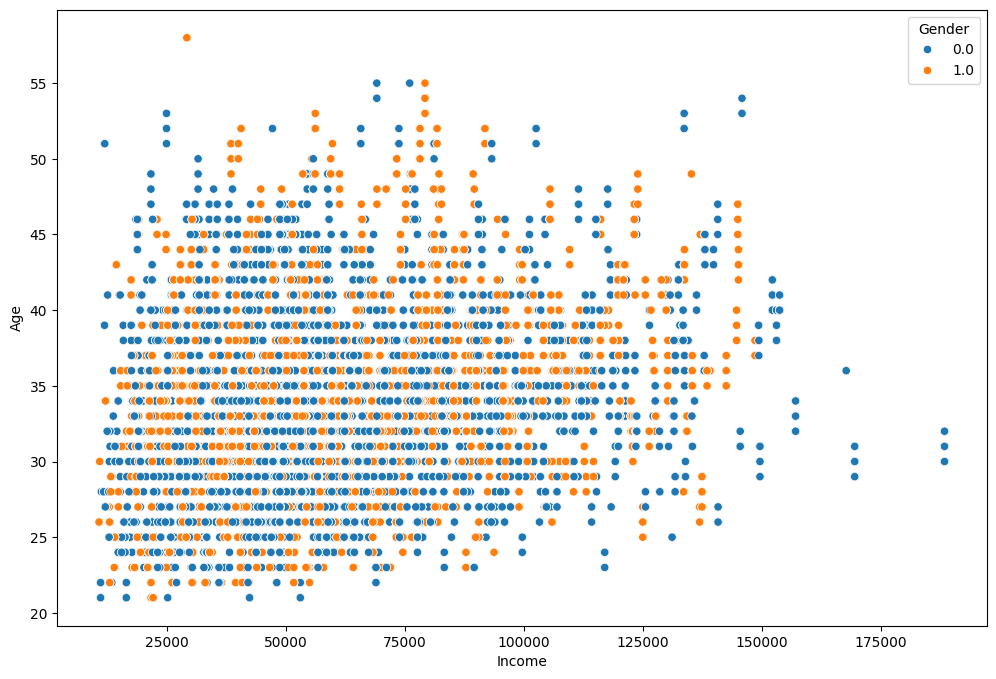

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Income'],y=df['Age'],hue=df['Gender'])

Illustrate the insights based on EDA

Comments on range of attributes, outliers of various attributes

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plots


2. **Data** Preprocessing

KNN Imputation

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


Convert all date time to datetime

In [36]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

KNN Imputation

Check for null

In [38]:
(df.isnull().sum()/len(df))*100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


In [39]:
num_vars=df.select_dtypes('number')
num_vars

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


In [40]:
num_vars.drop(columns='Driver_ID',inplace=True)

In [41]:
num_vars.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2,57387,1,1,2381060,2
1,28.0,0.0,2,57387,1,1,-665480,2
2,28.0,0.0,2,57387,1,1,0,2
3,31.0,0.0,2,67016,2,2,0,1
4,31.0,0.0,2,67016,2,2,0,1


In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer=KNNImputer(n_neighbors=5,metric='nan_euclidean',weights='uniform')
imp=imputer.fit_transform(num_vars)

In [44]:
df_new=pd.DataFrame(imp,columns=num_vars.columns)
df_new.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [45]:
df_new.isnull().sum()

,0
Age,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [46]:
left_vars=list(set(df.columns).difference(num_vars.columns))
left_vars

['MMM-YY', 'Dateofjoining', 'City', 'LastWorkingDate', 'Driver_ID']

In [47]:
df_new=pd.concat((df_new,df[left_vars]),axis=1)

In [48]:
df_new.head(8)

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,City,LastWorkingDate,Driver_ID
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,2018-12-24,C23,NaT,1
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,2018-12-24,C23,NaT,1
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,2018-12-24,C23,2019-03-11,1
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,2020-11-06,C7,NaT,2
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,2020-11-06,C7,NaT,2
5,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,2019-12-01,2019-12-07,C13,NaT,4
6,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,2020-01-01,2019-12-07,C13,NaT,4
7,43.0,0.0,2.0,65603.0,2.0,2.0,0.0,1.0,2020-02-01,2019-12-07,C13,NaT,4


Feature **Engineering**



Aggregate data in order to remove multiple occurrences of same driver data

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   19104 non-null  float64       
 1   Gender                19104 non-null  float64       
 2   Education_Level       19104 non-null  float64       
 3   Income                19104 non-null  float64       
 4   Joining Designation   19104 non-null  float64       
 5   Grade                 19104 non-null  float64       
 6   Total Business Value  19104 non-null  float64       
 7   Quarterly Rating      19104 non-null  float64       
 8   MMM-YY                19104 non-null  datetime64[ns]
 9   Dateofjoining         19104 non-null  datetime64[ns]
 10  City                  19104 non-null  object        
 11  LastWorkingDate       1616 non-null   datetime64[ns]
 12  Driver_ID             19104 non-null  int64         
dtypes: datetime64[ns

In [50]:
df_new.drop(columns=['MMM-YY','Dateofjoining'],inplace=True)

In [51]:
aggfunc={
    'Age':'max',
    'Gender':'first',
    'Education_Level':'last',
    'Income':'last',
    'Joining Designation':'last',
    'Grade':'last',
    'Total Business Value':'sum',
    'Quarterly Rating':'last',
    'LastWorkingDate':'last',
    'City':'first'
}

In [52]:
final_data=df_new.groupby('Driver_ID').agg(aggfunc).reset_index()

In [53]:
final_data.drop(columns='LastWorkingDate',inplace=True)

In [54]:
final_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11


In [55]:
final_data.shape

(2381, 10)

Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   19104 non-null  float64       
 1   Gender                19104 non-null  float64       
 2   Education_Level       19104 non-null  float64       
 3   Income                19104 non-null  float64       
 4   Joining Designation   19104 non-null  float64       
 5   Grade                 19104 non-null  float64       
 6   Total Business Value  19104 non-null  float64       
 7   Quarterly Rating      19104 non-null  float64       
 8   City                  19104 non-null  object        
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Driver_ID             19104 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.6+ MB


In [57]:
first_quarter=df_new.groupby('Driver_ID').agg({'Quarterly Rating':'first'})
last_quarter=df_new.groupby('Driver_ID').agg({'Quarterly Rating':'last'})
qr=(last_quarter['Quarterly Rating']>first_quarter['Quarterly Rating']).reset_index()

In [58]:
em=qr[qr['Quarterly Rating']==True]['Driver_ID']
l1=[]
for i in final_data['Driver_ID']:
  if i in em.values:
    l1.append(1)
  else:
    l1.append(0)

In [59]:
final_data['Quarterly_Rating_Increased']=l1

In [60]:
final_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Quarterly_Rating_Increased
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1


Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   19104 non-null  float64       
 1   Gender                19104 non-null  float64       
 2   Education_Level       19104 non-null  float64       
 3   Income                19104 non-null  float64       
 4   Joining Designation   19104 non-null  float64       
 5   Grade                 19104 non-null  float64       
 6   Total Business Value  19104 non-null  float64       
 7   Quarterly Rating      19104 non-null  float64       
 8   City                  19104 non-null  object        
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Driver_ID             19104 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.6+ MB


In [62]:
qr=df_new.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna().reset_index()
qr

,Driver_ID,LastWorkingDate
0,1,False
1,2,True
2,4,False
3,5,False
4,6,True
...,...,...
2376,2784,True
2377,2785,False
2378,2786,False
2379,2787,False


In [63]:
em1=qr[qr['LastWorkingDate']==True]['Driver_ID']
target=[]
for i in final_data['Driver_ID']:
  if i in em1.values:
    target.append(0)
  else:
    target.append(1)
final_data['Target']=target

In [64]:
final_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0,1
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0,0
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0,1
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0,1
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1,0


Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [65]:
first_income=df_new.groupby('Driver_ID').agg({'Income':'first'})
last_income=df_new.groupby('Driver_ID').agg({'Income':'last'})
qr=(last_income['Income']>first_income['Income']).reset_index()
em2=qr[qr['Income']==True]['Driver_ID']

l3=[]
for i in final_data['Driver_ID']:
  if i in em2.values:
    l3.append(1)
  else:
    l3.append(0)


In [66]:
final_data['Salary_Increased']=l3

In [67]:
final_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Quarterly_Rating_Increased,Target,Salary_Increased
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0,1,0
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0,0,0
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0,1,0
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0,1,0
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1,0,0


In [68]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377018e+01,5.933265e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.111718e-01,4.917397e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Quarterly Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


Check correlation among independent variables and how they interact with each other



<Axes: >

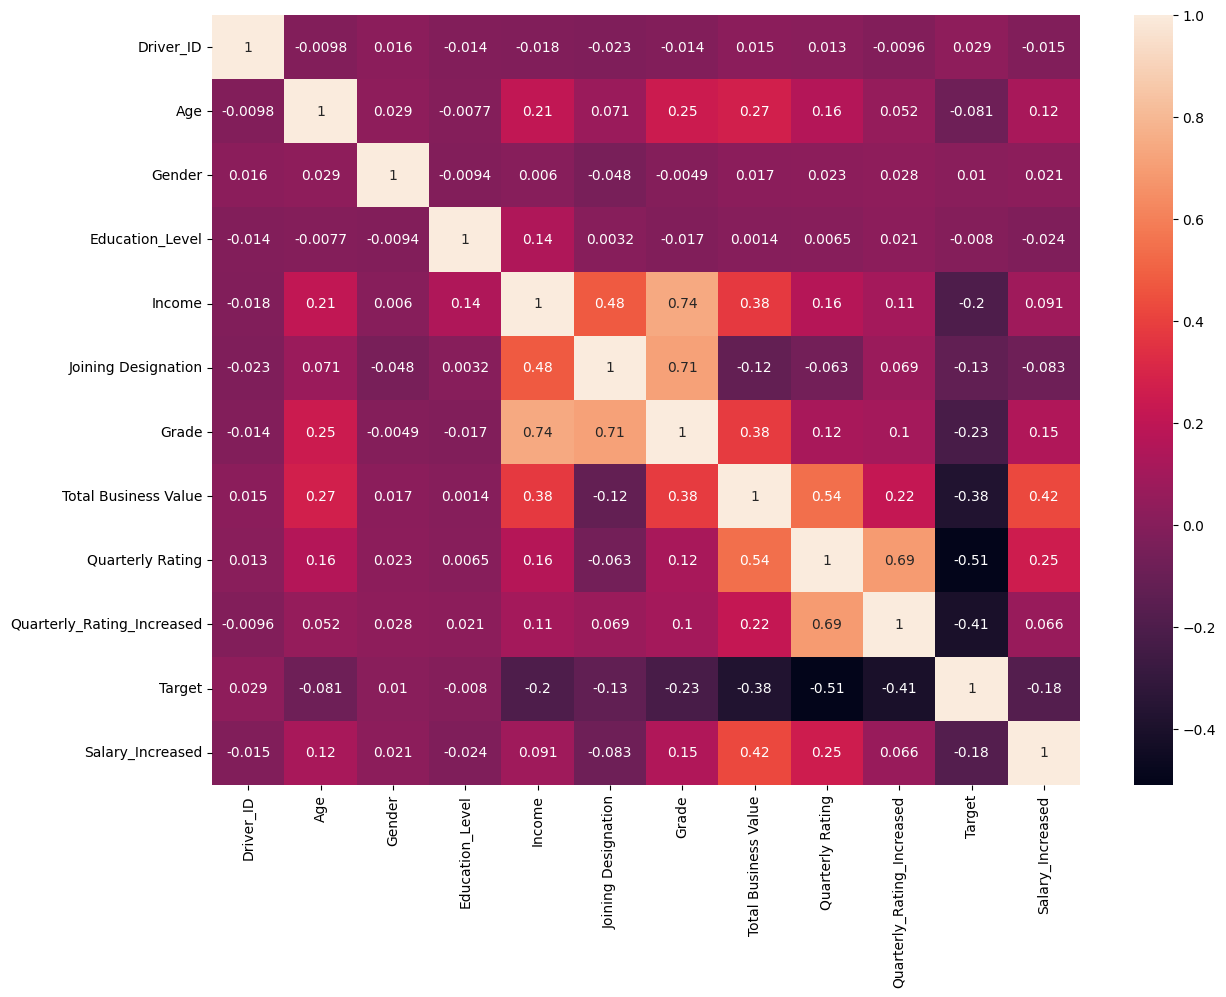

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap(final_data.select_dtypes(['int','float']).corr(),annot=True)

One hot encoding of the categorical variable

In [70]:
final_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Quarterly_Rating_Increased,Target,Salary_Increased
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0,1,0
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0,0,0
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0,1,0
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0,1,0
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1,0,0


In [71]:
df_encoded=pd.get_dummies(final_data,columns=['City'],drop_first=True).astype(int)

In [72]:
df_encoded.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28,0,2,57387,1,1,1715580,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,31,0,2,67016,2,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,4,43,0,2,65603,2,2,350000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,29,0,0,46368,1,1,120360,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6,31,1,1,78728,3,3,1265000,2,1,...,0,0,0,0,0,0,0,0,0,0


Start Preprocessing for training model

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X=df_encoded.drop(columns=['Target','Driver_ID'])
y=df_encoded[['Target']]

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [76]:
print(X_train.shape,y_train.shape)

(1904, 38) (1904, 1)


In [77]:
print(X_test.shape,y_test.shape)

(477, 38) (477, 1)


Class is imbalanced

In [78]:
y_train.value_counts()

,count
Target,
1,1287
0,617


In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smote=SMOTE()
X_resample,y_train_resample=smote.fit_resample(X_train,y_train)
print(X_resample.shape,y_train_resample.shape)

(2574, 38) (2574, 1)


In [81]:
y_train_resample.value_counts()

,count
Target,
0,1287
1,1287


Scaling

In [82]:
X_resample.head(6)

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Salary_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,42,0,1,58534,3,3,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,27,1,2,28318,1,1,5302040,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1,1,58207,1,2,16290800,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,72839,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,0,0,58277,1,1,194320,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,30,1,0,87010,3,3,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_resample)
X_test_scaled=scaler.transform(X_test)

In [85]:
X_train_scaled.shape

(2574, 38)

Model **building**

1 Ensemble - Bagging Algorithm

Before using smote

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
print(X_train_scale.shape,y_train.shape)
print(X_test_scale.shape,y_test.shape)

(1904, 38) (1904, 1)
(477, 38) (477, 1)


In [88]:
params={
    'n_estimators':[50, 100, 150, 200,300,400],
    'max_depth':[2, 3, 4]
}

In [89]:
rf=RandomForestClassifier(class_weight='balanced')
gd=GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='f1',verbose=True,n_jobs=-1)

In [90]:
gd.fit(X_train_scale,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 300, 400]},
             scoring='f1', verbose=True)

In [91]:
print("Best Parameter",gd.best_params_)
print("Best Score",gd.best_score_)

Best Parameter {'max_depth': 4, 'n_estimators': 100}
Best Score 0.857347357991792


In [92]:
bag_model=gd.best_estimator_
bag_model.fit(X_train_scale,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4)

In [93]:
print('Train score',bag_model.score(X_train_scale,y_train))
print('Test Score',bag_model.score(X_test_scale,y_test))

Train score 0.8082983193277311
Test Score 0.790356394129979


In [94]:
y_pred_bag_before=bag_model.predict(X_test_scale)

After balancing data

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [96]:
params={
    'n_estimators':[50, 100, 150, 200,300,400],
    'max_depth':[2, 3, 4]
}

In [97]:
rf=RandomForestClassifier()
gd=GridSearchCV(estimator=rf,param_grid=params,cv=3,verbose=True,scoring='f1',n_jobs=-1)

In [98]:
gd.fit(X_train_scaled,y_train_resample)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 300, 400]},
             scoring='f1', verbose=True)

In [99]:
res=gd.cv_results_
for i in range(len(res['params'])):
  print(f"Paramters {res['params'][i]}, Mean Test score {res['mean_test_score'][i]} , Rank Mean Score {res['rank_test_score'][i]}")

Paramters {'max_depth': 2, 'n_estimators': 50}, Mean Test score 0.7734955375125434 , Rank Mean Score 15
Paramters {'max_depth': 2, 'n_estimators': 100}, Mean Test score 0.774947963328818 , Rank Mean Score 7
Paramters {'max_depth': 2, 'n_estimators': 150}, Mean Test score 0.775282070347355 , Rank Mean Score 4
Paramters {'max_depth': 2, 'n_estimators': 200}, Mean Test score 0.774441039080219 , Rank Mean Score 11
Paramters {'max_depth': 2, 'n_estimators': 300}, Mean Test score 0.7727451331114589 , Rank Mean Score 17
Paramters {'max_depth': 2, 'n_estimators': 400}, Mean Test score 0.7737597688425253 , Rank Mean Score 14
Paramters {'max_depth': 3, 'n_estimators': 50}, Mean Test score 0.7734229310029321 , Rank Mean Score 16
Paramters {'max_depth': 3, 'n_estimators': 100}, Mean Test score 0.7742441056643351 , Rank Mean Score 12
Paramters {'max_depth': 3, 'n_estimators': 150}, Mean Test score 0.7748549243113044 , Rank Mean Score 8
Paramters {'max_depth': 3, 'n_estimators': 200}, Mean Test scor

In [100]:
print("Best parameter",gd.best_params_)
print("Best score",gd.best_score_)

Best parameter {'max_depth': 4, 'n_estimators': 300}
Best score 0.7771188574524088


In [101]:
random_model=gd.best_estimator_
random_model.fit(X_train_scaled,y_train_resample)

RandomForestClassifier(max_depth=4, n_estimators=300)

In [102]:
y_pred_bag_after=random_model.predict(X_test_scaled)

In [103]:
print("Train Accuracy",random_model.score(X_train_scaled,y_train_resample))
print("Test Accuracy",random_model.score(X_test_scaled,y_test))

Train Accuracy 0.7513597513597513
Test Accuracy 0.7882599580712788


**1 Ensemble - Boosting Algorithm**

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [105]:
params={
    'n_estimators':[50,100],
    'max_depth':[2, 3],
    'subsample':[0.1, 0.2, 0.5, 0.8, 1],
    'learning_rate':[0.05],
    "loss": ["log_loss", "exponential"],

}

In [106]:
boost=GradientBoostingClassifier()
gd=GridSearchCV(estimator=boost,param_grid=params,cv=3,verbose=True,scoring='f1',n_jobs=-1)
gd.fit(X_train_scaled,y_train_resample)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [2, 3], 'n_estimators': [50, 100],
                         'subsample': [0.1, 0.2, 0.5, 0.8, 1]},
             scoring='f1', verbose=True)

In [107]:
print("Best Parameter",gd.best_params_)
print("Best score",gd.best_score_)

Best Parameter {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score 0.782758662938944


In [108]:
grad_model=gd.best_estimator_
grad_model.fit(X_train_scale,y_train)

GradientBoostingClassifier(learning_rate=0.05, subsample=0.8)

In [109]:
y_grad_predict=grad_model.predict(X_test_scale)

In [110]:
print('Train Accuracy',grad_model.score(X_train_scale,y_train))
print("Test Accuracy",grad_model.score(X_test_scale,y_test))

Train Accuracy 0.8366596638655462
Test Accuracy 0.8218029350104822


XGboost Boosting algorith because it's fast

In [111]:
params = {
    'n_estimators': [100, 200,300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'class_weight':['balanced']
}

In [112]:
xgb=XGBClassifier()
gd=GridSearchCV(estimator=xgb,param_grid=params,cv=3,verbose=True,n_jobs=-1,scoring='f1')
gd.fit(X_train_scale,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=True)

In [113]:
print("Best Parameter",gd.best_params_)
print("Best score",gd.best_score_)

Best Parameter {'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score 0.8690826829306627


In [114]:
xgb_model=gd.best_estimator_
xgb_model.fit(X_train_scale,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [115]:
print("Train Accuracy",xgb_model.score(X_train_scale,y_train))
print("Test Accuracy",xgb_model.score(X_test_scale,y_test))

Train Accuracy 0.8403361344537815
Test Accuracy 0.8134171907756813


In [116]:
y_pred_xgb=xgb_model.predict(X_test_scale)

**4. Results Evaluation**

ROC AUC Curve & comments and Classification Report (Confusion Matrix etc)

In [117]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report

1 For bagging

Before Smote

ROC Score 0.7309311591226485


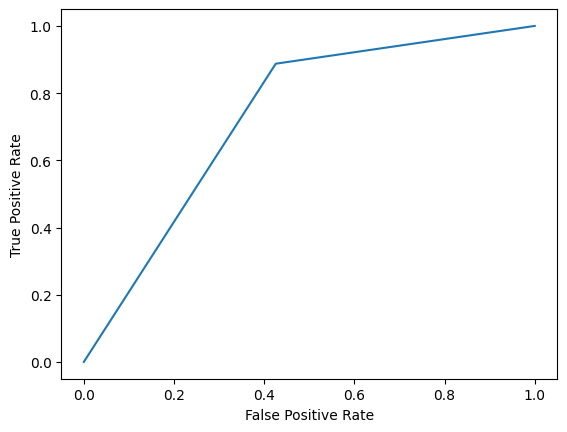

In [118]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_bag_before)
roc_score=roc_auc_score(y_test,y_pred_bag_before)
print("ROC Score",roc_score)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

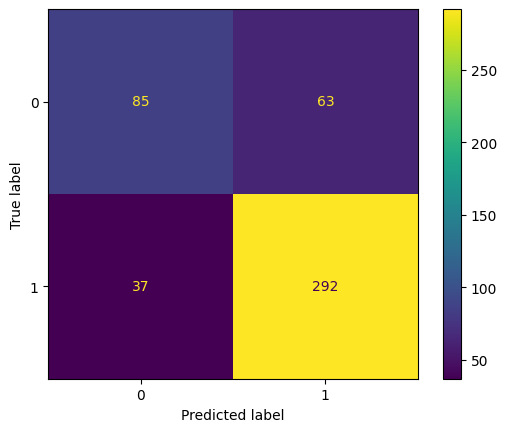

In [119]:
cm=confusion_matrix(y_test,y_pred_bag_before)
ConfusionMatrixDisplay(cm).plot()

In [120]:
res=classification_report(y_test,y_pred_bag_before)
print(res)

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       148
           1       0.82      0.89      0.85       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.78      0.79      0.78       477



Random Forest Classifier with balanced class weight

Out of all prediction, the measure for correctly predicted 0 is 70% and for 1 is 82% (Precision)

Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 89% (Recall)

As this is imbalanced dataset. We give importance to F1-Score metrics

F1 Score of 0 is 63%

F! Score of 1 is 85%

Random Forest using smote

ROC Score : 0.7312700238232153


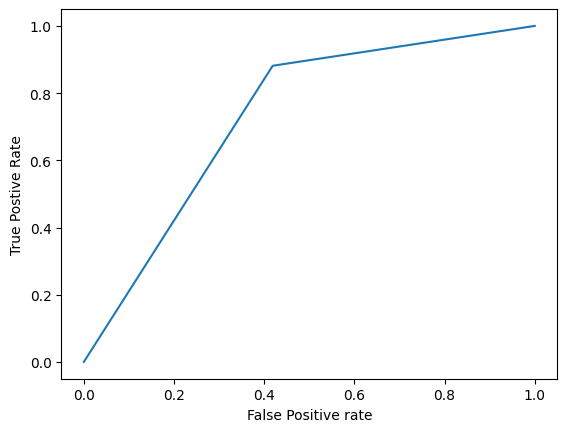

In [121]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_bag_after)
roc_score=roc_auc_score(y_test,y_pred_bag_after)
print('ROC Score :',roc_score)
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Postive Rate')
plt.show()

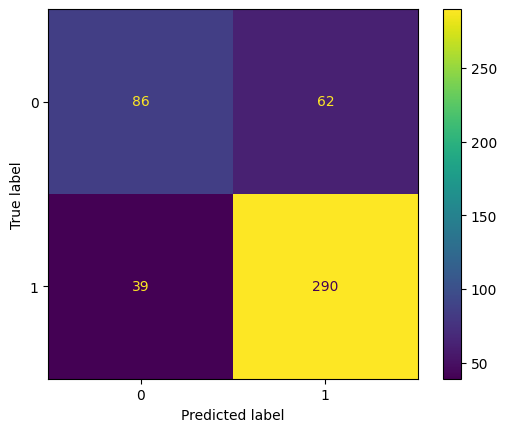

In [122]:
cm=confusion_matrix(y_test,y_pred_bag_after)
ConfusionMatrixDisplay(cm).plot()

In [123]:
print(classification_report(y_pred_bag_after,y_test))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       125
           1       0.88      0.82      0.85       352

    accuracy                           0.79       477
   macro avg       0.73      0.76      0.74       477
weighted avg       0.80      0.79      0.79       477



Random Forest Classifier with balanced data using smote

Out of all prediction, the measure for correctly predicted 0 is 58% and for 1 is 88% (Precision)

Out of all actual 0, the measure for correctly predicted is 69% and for 1 is 82% (Recall)

As this is imbalanced dataset. We give importance to F1-Score metrics

F1 Score of 0 is 63%
F! Score of 1 is 85%

Boosting confusion matrix and classification report


gradient boosting

ROC score  0.7481516470878173


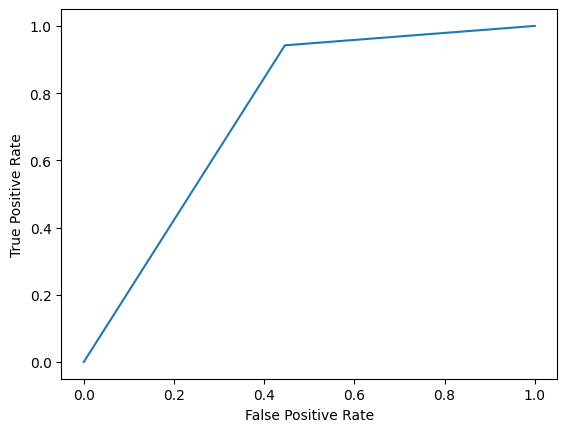

In [124]:
fpr,tpr,threshold=roc_curve(y_test,y_grad_predict)
roc_score=roc_auc_score(y_test,y_grad_predict)
print('ROC score ',roc_score)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

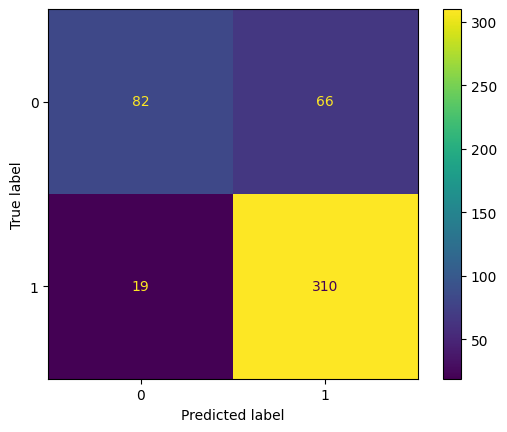

In [125]:
cm=confusion_matrix(y_test,y_grad_predict)
ConfusionMatrixDisplay(cm).plot()

In [126]:
print(classification_report(y_test,y_grad_predict))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       148
           1       0.82      0.94      0.88       329

    accuracy                           0.82       477
   macro avg       0.82      0.75      0.77       477
weighted avg       0.82      0.82      0.81       477



Gradient Boosting Classifier Metrics

Out of all prediction, the measure for correctly predicted 0 is 81% and for 1 is 82% (Precision)

Out of all actual 0, the measure for correctly predicted is 53% and for 1 is 95% (Recall)

As this is imbalanced dataset. We give importance to F1-Score metrics


F1 Score of 0 is 64%

F1 Score of 1 is 88%

XGBoosting confusion matrix and classification_report

ROC score 0.7402139981927216


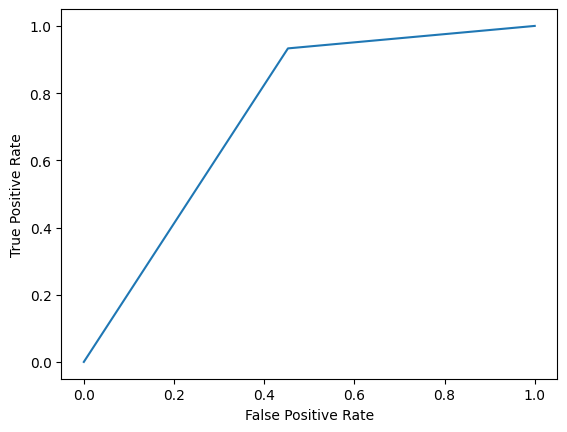

In [127]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_xgb)
roc_score=roc_auc_score(y_test,y_pred_xgb)
print("ROC score",roc_score)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

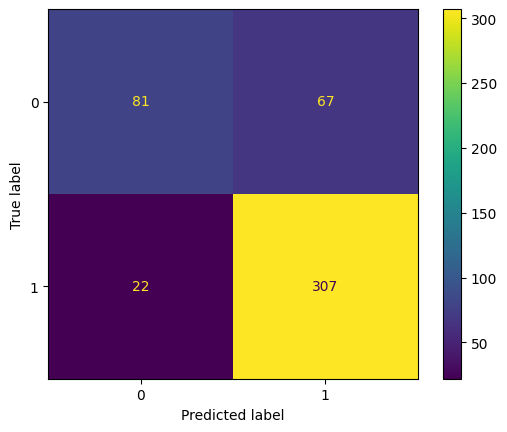

In [128]:
cm=confusion_matrix(y_test,y_pred_xgb)
ConfusionMatrixDisplay(cm).plot()

In [129]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65       148
           1       0.82      0.93      0.87       329

    accuracy                           0.81       477
   macro avg       0.80      0.74      0.76       477
weighted avg       0.81      0.81      0.80       477



XGBoost Classifier with balanced class weight

Out of all prediction, the measure for correctly predicted 0 is 79% and for 1 is 82% (Precision)

Out of all actual 0, the measure for correctly predicted is 55% and for 1 is 93% (Recall)

As this is imbalanced dataset. We give importance to F1-Score metrics

F1 Score of 0 is 65%

F1 Score of 1 is 87%


**Actionable Insights & Recommendations**

In [130]:
final_data['Target'].value_counts()

,count
Target,
1,1616
0,765


In [131]:
final_data['Quarterly Rating'].value_counts()

,count
Quarterly Rating,
1.0,1744
2.0,362
3.0,168
4.0,107


In [132]:
final_data['Quarterly_Rating_Increased'].value_counts()

,count
Quarterly_Rating_Increased,
0,2023
1,358


Out of 2381 drivers 1616 have left the company.

We need to incentivise the drivers overtime or other perks to overcome churning
The employees whose quarterly rating has increased are less likely to leave the organization.

Company needs to implement the reward system for the customer who provide the feedback and rate drivers

The employees whose monthly salary has not increased are more likely to leave the organization.

Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.

Out of 2381 employees, 1744 employees had their last quarterly rating as 1.

Out of 2381 employees, the quarterly rating has not increased for 2023
employees. This is red flag for the company which needs to regulate.
Company needs to look why customers are not rating drivers.

Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators

We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset. More data will overcome this issue.

The Random Forest Classifier attains the Recall score of 89% for the driver who left the company. Which indicates that model is performing the decent job.